In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import datetime
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 

In [3]:
### For 11 Feb 2020

#Read in GOES brightness temperatures

df_merged = pd.read_csv(r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\GOES-16_ABI_data\merged_datasets.csv')
df_merged.set_index(pd.to_datetime(df_merged.datetime), inplace=True)

#Read in phase angles

df16 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-16_phase_angles.csv')
df16.set_index(pd.to_datetime(df16.datetime_list), inplace=True)

df17 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-17_phase_angles.csv')
df17.set_index(pd.to_datetime(df17.datetime_list), inplace=True)

In [4]:
signed_phase_angles = [df16.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df16.iloc[1:].phase_angle):
    if df16.iloc[i].phase_angle > df16.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df16['signed_phase_angle'] = signed_phase_angles


signed_phase_angles = [df17.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df17.iloc[1:].phase_angle):
    if df17.iloc[i].phase_angle > df17.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df17['signed_phase_angle'] = signed_phase_angles

In [5]:
tcc20_mean_g16 = [0.19133497, 0.131049888, 0.271328671, 0.319058977, 0.317577706, 0.448319376]
tcc20_mean_g17 = [0.124487004, 0.164508393, 0.489817052, 0.526726313, 0.378679694, 0.357195391, 0.446153846]

In [6]:
path = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\\'

In [7]:
# GOES-16 timeseries filepaths

pixelA_g16_lst = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelA_g16_rad = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_07-14_R.csv')

pixelB_g16_lst = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelB_g16_rad = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_07-14_R.csv')

pixelC_g16_rad = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_07-14_R.csv')
pixelC_g16_lst = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_01-15_LST.csv')

pixelD_g16_lst = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelD_g16_rad = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_07-14_R.csv')

pixelE_g16_lst = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelE_g16_rad = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_07-14_R.csv')

pixelNW_g16_lst = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelNW_g16_rad = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_07-14_R.csv')

# GOES-17 timeseries filepaths

pixelA_g17_lst = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelA_g17_rad = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_R.csv')

pixelB_g17_lst = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelB_g17_rad = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC1_g17_lst = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelC1_g17_rad = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC2_g17_rad = pd.read_csv(path + 'pixelC2_GOES-17_ABI_02_01-15_R.csv')
pixelC2_g17_lst = pd.read_csv(path + 'pixelC2_GOES-17_ABI_2020_02_01-15_LST.csv')

pixelD_g17_lst = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelD_g17_rad = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_R.csv')

pixelE_g17_lst = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelE_g17_rad = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_R.csv')

pixelNW_g17_lst = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelNW_g17_rad = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_R.csv')

In [8]:
df_list = [pixelA_g16_lst ,pixelA_g16_rad,pixelB_g16_lst,pixelB_g16_rad,pixelC_g16_rad,pixelC_g16_lst,pixelD_g16_lst,pixelD_g16_rad,pixelE_g16_lst,pixelE_g16_rad,pixelNW_g16_lst,pixelNW_g16_rad,pixelA_g17_lst,pixelA_g17_rad,pixelB_g17_lst,pixelB_g17_rad,pixelC1_g17_lst,pixelC1_g17_rad,pixelC2_g17_rad,pixelC2_g17_lst,pixelD_g17_lst,pixelD_g17_rad,pixelE_g17_lst,pixelE_g17_rad,pixelNW_g17_lst,pixelNW_g17_rad]

for df in df_list:
    if 't' in df.columns:
        df['datetime'] = pd.to_datetime(df.t)
    elif 'time' in df.columns:
        df['datetime'] = pd.to_datetime(df.time)
    df.set_index('datetime', inplace=True)

at what phase angles is the sun above the horizon?

In [9]:
startdate = '2020-02-11 04'


sunset1 = '2020-02-11 00:46:00'
sunrise1 = '2020-02-11 14:10:00'

sunset2 = '2020-02-12 00:46:00'
sunrise2 = '2020-02-12 14:10:00'


enddate =  '2020-02-12 01'

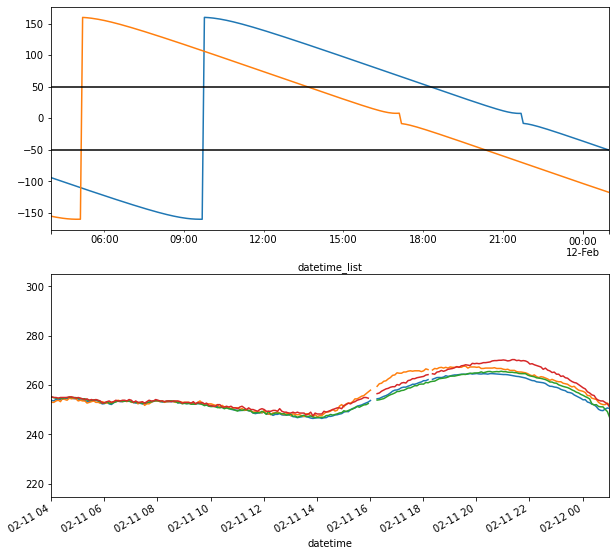

In [10]:
fig, [ax, axA] = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
df17.signed_phase_angle.plot(ax=ax)
df16.signed_phase_angle.plot(ax=ax)

# GOES-16
pixelA_g16_rad.b13_tb_2km.plot(ax=axA)
pixelA_g16_rad.b7_tb_2km.plot(ax=axA)

# GOES-17
pixelA_g17_rad.b13_tb_2km.plot(ax=axA)
pixelA_g17_rad.b7_tb_2km.plot(ax=axA)

ax.set_xlim(startdate, enddate)
axA.set_xlim(startdate, enddate)

ax.axhline(50, c='k')
ax.axhline(-50, c='k')

In [11]:
pixelNW_g17_rad = pixelNW_g17_rad.dropna()
pixelNW_g16_rad = pixelNW_g16_rad.dropna()


df17 = df17.reindex(pixelNW_g17_rad.index, axis=0)
df16 = df16.reindex(pixelNW_g16_rad.index, axis=0)

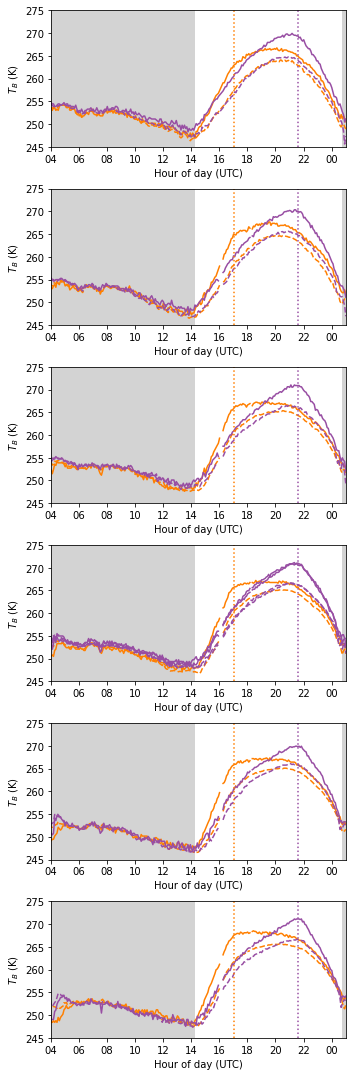

In [12]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW, color='#ff7f00', linestyle='--')
pixelNW_g16_rad.b7_tb_2km.plot(ax=axNW, color='#ff7f00', linestyle='-')

# GOES-17
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW, color='#984ea3', linestyle='--')
pixelNW_g17_rad.b7_tb_2km.plot(ax=axNW, color='#984ea3', linestyle='-')

### Pixel A

# GOES-16
pixelA_g16_rad.b13_tb_2km.plot(ax=axA, color='#ff7f00', linestyle='--')
pixelA_g16_rad.b7_tb_2km.plot(ax=axA, color='#ff7f00', linestyle='-')

# GOES-17
pixelA_g17_rad.b13_tb_2km.plot(ax=axA, color='#984ea3', linestyle='--')
pixelA_g17_rad.b7_tb_2km.plot(ax=axA, color='#984ea3', linestyle='-')

### Pixel B

# GOES-16
pixelB_g16_rad.b13_tb_2km.plot(ax=axB, color='#ff7f00', linestyle='--')
pixelB_g16_rad.b7_tb_2km.plot(ax=axB, color='#ff7f00', linestyle='-')

# GOES-17
pixelB_g17_rad.b13_tb_2km.plot(ax=axB, color='#984ea3', linestyle='--')
pixelB_g17_rad.b7_tb_2km.plot(ax=axB, color='#984ea3', linestyle='-')

### Pixel C

# GOES-16
pixelC_g16_rad.b13_tb_2km.plot(ax=axC, color='#ff7f00', linestyle='--')
pixelC_g16_rad.b7_tb_2km.plot(ax=axC, color='#ff7f00', linestyle='-')

# GOES-17
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC, color='#984ea3', linestyle='--')
pixelC1_g17_rad.b7_tb_2km.plot(ax=axC, color='#984ea3', linestyle='-')

pixelC2_g17_rad.b13_tb_2km.plot(ax=axC, color='#984ea3', linestyle='--')
pixelC2_g17_rad.b7_tb_2km.plot(ax=axC, color='#984ea3', linestyle='-')

### Pixel D

# GOES-16
pixelD_g16_rad.b13_tb_2km.plot(ax=axD, color='#ff7f00', linestyle='--')
pixelD_g16_rad.b7_tb_2km.plot(ax=axD, color='#ff7f00', linestyle='-')

# GOES-17
pixelD_g17_rad.b13_tb_2km.plot(ax=axD, color='#984ea3', linestyle='--')
pixelD_g17_rad.b7_tb_2km.plot(ax=axD, color='#984ea3', linestyle='-')

### Pixel E

# GOES-16
pixelE_g16_rad.b13_tb_2km.plot(ax=axE, color='#ff7f00', linestyle='--')
pixelE_g16_rad.b7_tb_2km.plot(ax=axE, color='#ff7f00', linestyle='-')

# GOES-17
pixelE_g17_rad.b13_tb_2km.plot(ax=axE, color='#984ea3', linestyle='--')
pixelE_g17_rad.b7_tb_2km.plot(ax=axE, color='#984ea3', linestyle='-')

# formatting
for this_ax in axs.ravel():
    # draw lines for times of minimum phase angles
    this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], 0, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], 0, 1000, color='lightgray', zorder=-999)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(245,275)
    this_ax.set_ylabel('$T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

In [13]:
def mwir_tir_diff_plot(ax, df_rad,
                       startdate, enddate, sunrise1, sunset1, sunrise2, sunset2,
                       color):

    
    # segment data by day/night
    data_night1 = df_rad.b7_tb_2km[startdate:sunrise1] - df_rad.b13_tb_2km[startdate:sunrise1]
    data_day = df_rad.b7_tb_2km[sunrise1:sunset2] - df_rad.b13_tb_2km[sunrise1:sunset2]
    data_night2 = df_rad.b7_tb_2km[sunset2:enddate] - df_rad.b13_tb_2km[sunset2:enddate]

    # plot
    data_day.plot(ax=ax, linestyle='none', marker='.', color=color)
    data_night1.plot(ax=ax, linestyle='none', marker='x', color=color, alpha=0.5, markersize=5)
    data_night2.plot(ax=ax, linestyle='none', marker='x', color=color, alpha=0.5, markersize=5)

    return ax

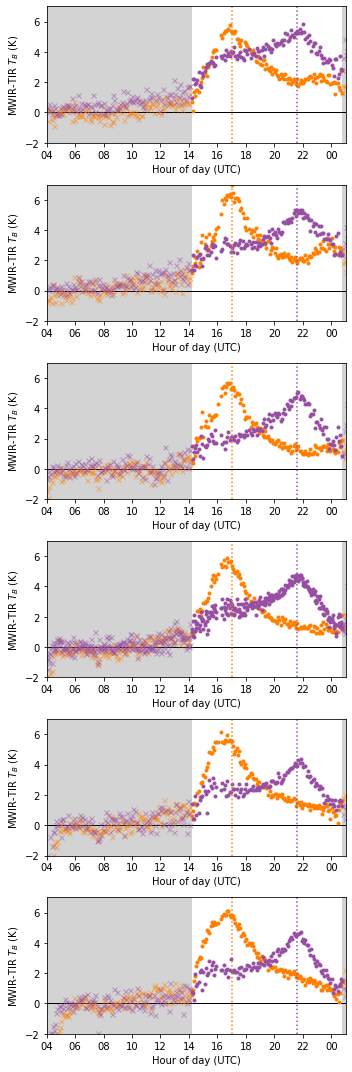

In [14]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

## Pixel NW
axNW = mwir_tir_diff_plot(axNW, pixelNW_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axNW = mwir_tir_diff_plot(axNW, pixelNW_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')

### Pixel A
axA = mwir_tir_diff_plot(axA, pixelA_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axA = mwir_tir_diff_plot(axA, pixelA_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')

### Pixel B
axB = mwir_tir_diff_plot(axB, pixelB_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axB = mwir_tir_diff_plot(axB, pixelB_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')

### Pixel C
axC = mwir_tir_diff_plot(axC, pixelC_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axC = mwir_tir_diff_plot(axC, pixelC1_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')
axC = mwir_tir_diff_plot(axC, pixelC2_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')


### Pixel D
axD = mwir_tir_diff_plot(axD, pixelD_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axD = mwir_tir_diff_plot(axD, pixelD_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')


### Pixel E
axE = mwir_tir_diff_plot(axE, pixelE_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axE = mwir_tir_diff_plot(axE, pixelE_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')



# formatting
for this_ax in axs.ravel():
    # draw lines for times of minimum phase angles
    this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], -100, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], -100, 1000, color='lightgray', zorder=-999)
    #this_ax.text(pd.Timestamp('2020-02-11 07:00:00'), 4.5, 'night', color='#333333')
    this_ax.axhline(0, color='k', zorder=-1, lw=1)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(-2,7)
    this_ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

In [15]:
#df17 = df17.reindex(pixelNW_g17_rad.index, axis=0)
#
#g16_range_diff = []
#g16_mean_diff = []
#g16_std_diff = []
#
#g17_range_diff = []
#g17_mean_diff = []
#g17_std_diff = []
#
## plot phase angle curves
#fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)
#
#[axNW, axA, axB, axC, axD, axE] = axs.ravel()
#
#
#diff = pixelNW_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelNW_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axNW.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axNW.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelA_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelA_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axA.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axA.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelB_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelB_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axB.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelB_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelB_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axB.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelC_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelC_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axC.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelC1_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC1_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axC.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelC2_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC2_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axC.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelD_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelD_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axD.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelD_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelD_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axD.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#

#diff = pixelE_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelE_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axE.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelE_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelE_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axE.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#
#for ax in [axNW, axA, axB, axC, axD, axE]:
#    #ax.set_xlim(-50,50)
#    ax.set_ylim(0,7)
#    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
#    ax.set_xlabel('phase angle, θ ($\degree$)')
#    ax.axvline(0, color='k', zorder=-999, lw=1)

In [16]:
#df17 = df17.reindex(pixelNW_g17_rad.index, axis=0)
#
#g16_range_diff = []
#g16_mean_diff = []
#g16_std_diff = []
#
#g17_range_diff = []
#g17_mean_diff = []
#g17_std_diff = []
#
## plot phase angle curves
#fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)
#
#[axNW, axA, axB, axC, axD, axE] = axs.ravel()
#
#
#diff16 = pixelNW_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelNW_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axNW.plot(df16.signed_phase_angle[startdate:enddate], diff16, '.', color='#ff7f00')
#
#
#diff17 = pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axNW.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#diff16 = pixelA_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelA_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axA.plot(df16.signed_phase_angle[startdate:enddate], diff16, '.', color='#ff7f00')
#
#
#diff17 = pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axA.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#diff16 = pixelB_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelB_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axB.plot(df16.signed_phase_angle[startdate:enddate], diff16, '.', color='#ff7f00')
#
#
#diff17 = pixelB_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelB_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axB.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#diff16 = pixelC_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelC_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axC.plot(df16.signed_phase_angle[startdate:enddate], diff16, '.', color='#ff7f00')
#
#
#diff17 = pixelC1_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC1_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axC.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#diff17 = pixelC2_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC2_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axC.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#diff16 = pixelD_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelD_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axD.plot(df16.signed_phase_angle[startdate:enddate], diff16, '.', color='#ff7f00')
#
#
#diff17 = pixelD_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelD_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axD.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#diff16 = pixelE_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelE_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axE.plot(df16.signed_phase_angle[startdate:enddate], diff16, '.', color='#ff7f00')
#
#
#diff17 = pixelE_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelE_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axE.plot(-1*df17.signed_phase_angle[startdate:enddate], diff17, '.', color='#984ea3')
#
#
#
#
#for ax in [axNW, axA, axB, axC, axD, axE]:
#    #ax.set_xlim(-50,50)
#    ax.set_ylim(0,7)
#    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
#    ax.set_xlabel('phase angle, θ ($\degree$)')
#    ax.axvline(0, color='k', zorder=-999, lw=1)

In [17]:
#plt.plot(tcc20_mean_g16, g16_mean_diff,'+', c='#ff7f00')
#plt.plot(tcc20_mean_g17, g17_mean_diff,'x', c='#984ea3')
#plt.xlabel('fveg')
#plt.ylabel('mean diff');

In [18]:
#plt.plot(tcc20_mean_g16, g16_std_diff,'+', c='#ff7f00')
#plt.plot(tcc20_mean_g17, g17_std_diff,'x', c='#984ea3')
#plt.xlabel('fveg')
#plt.ylabel('std diff');

In [19]:
#plt.plot(tcc20_mean_g16, g16_range_diff,'+', c='#ff7f00')
#plt.plot(tcc20_mean_g17, g17_range_diff,'x', c='#984ea3')
#plt.xlabel('fveg')
#plt.ylabel('range diff');

---

In [20]:
def backscatter_function(phase_angles, e0, A, B, C, D):
    
    # half width, peak magnitude, shift up or down, symetrical linear, asymmetrical linear
    
    return A / (1+(abs(phase_angles))/e0) + B + C*phase_angles# + D*phase_angles**2

In [21]:
def fit_backscatter_function(xdata, ydata):

    parameters, covariance = curve_fit(backscatter_function, xdata, ydata, maxfev=10000)
    
    x_fit = np.arange(xdata.min(),xdata.max())
    y_fit = backscatter_function(x_fit, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])
    
    # find fwhm
    fit_max = y_fit.max()
    # create a spline of x and y_fit - half max
    spline = UnivariateSpline(x_fit, y_fit - (fit_max/2), s=0)
    fit_roots = spline.roots() # find the roots
    if len(fit_roots) == 1:
        fwhm = abs(fit_roots[0]*2)
    elif len(fit_roots) == 2:
        fwhm = fit_roots[1] - fit_roots[0]
    else:
        fwhm = np.nan
    
    rmse = np.sqrt(np.mean((backscatter_function(xdata, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]) - ydata)**2))
    print(f'RMSE = {str(np.round(rmse,2))}')
    
    return x_fit, y_fit, fit_max, fwhm

In [22]:
def phase_angle_plot(ax, df_phase_angles, 
                     df_rad, 
                     fit_max, fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise2, sunset2,
                     color, max_phase_angle=None):

    
    # GOES-16
    xdata_night1 = df_phase_angles.signed_phase_angle[startdate:sunrise1]
    ydata_night1 = df_rad.b7_tb_2km[df_phase_angles.index][startdate:sunrise1] - df_rad.b13_tb_2km[df_phase_angles.index][startdate:sunrise1]
    xdata_day = df_phase_angles.signed_phase_angle[sunrise1:sunset2]
    ydata_day = df_rad.b7_tb_2km[df_phase_angles.index][sunrise1:sunset2] - df_rad.b13_tb_2km[df_phase_angles.index][sunrise1:sunset2]
    xdata_night2 = df_phase_angles.signed_phase_angle[sunset2:enddate]
    ydata_night2 = df_rad.b7_tb_2km[df_phase_angles.index][sunset2:enddate] - df_rad.b13_tb_2km[df_phase_angles.index][sunset2:enddate]

    # fit curve to GOES-16 daytime phase angles only
    if max_phase_angle == None:
        print(max_phase_angle)
        x_fit, y_fit, this_fit_max, this_fwhm = fit_backscatter_function(xdata_day, ydata_day)
    else:
        print(max_phase_angle)
        x_fit, y_fit, this_fit_max, this_fwhm = fit_backscatter_function(xdata_day[(xdata_day>-max_phase_angle) & (xdata_day<max_phase_angle)], ydata_day[(xdata_day>-max_phase_angle) & (xdata_day<max_phase_angle)])
    
    fit_max.append(this_fit_max)
    fwhm.append(this_fwhm)
    ax.plot(x_fit,y_fit,'-', color='k', alpha=0.6, lw=1, zorder=9999)
    ax.plot(xdata_day, ydata_day, '.', color=color)
    ax.plot(xdata_night1, ydata_night1, 'x', color=color, alpha=0.5, markersize=5)
    ax.plot(xdata_night2, ydata_night2, 'x', color=color, alpha=0.5, markersize=5)
    #ax.text(xtext, ytext, f'max: {str(np.round(fit_max,1))}\nFWHM: {str(np.round(fwhm,1))}', color=color)

    return ax, fit_max, fwhm

NW
50
RMSE = 0.34
50
RMSE = 0.29
A
50
RMSE = 0.37
50
RMSE = 0.3
B
50
RMSE = 0.4
50
RMSE = 0.34
C
50
RMSE = 0.46
50
RMSE = 0.24
50
RMSE = 0.26
D
50
RMSE = 0.62
50
RMSE = 0.21
E
50
RMSE = 0.56
50
RMSE = 0.24


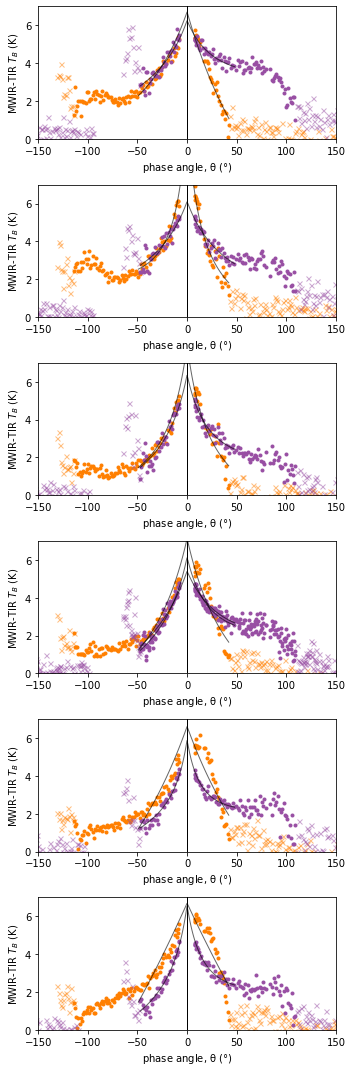

In [23]:
xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

max_phase_angle = 50

# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


print('NW')
axNW, g16_fit_max, g16_fwhm = phase_angle_plot(axNW, df16, pixelNW_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axNW, g17_fit_max, g17_fwhm = phase_angle_plot(axNW, df17, pixelNW_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('A')
axA, g16_fit_max, g16_fwhm = phase_angle_plot(axA, df16, pixelA_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axA, g17_fit_max, g17_fwhm = phase_angle_plot(axA, df17, pixelA_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('B')
axB, g16_fit_max, g16_fwhm = phase_angle_plot(axB, df16, pixelB_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axB, g17_fit_max, g17_fwhm = phase_angle_plot(axB, df17, pixelB_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('C')
axC, g16_fit_max, g16_fwhm = phase_angle_plot(axC, df16, pixelC_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC1_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC2_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('D')
axD, g16_fit_max, g16_fwhm = phase_angle_plot(axD, df16, pixelD_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axD, g17_fit_max, g17_fwhm = phase_angle_plot(axD, df17, pixelD_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('E')
axE, g16_fit_max, g16_fwhm = phase_angle_plot(axE, df16, pixelE_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axE, g17_fit_max, g17_fwhm = phase_angle_plot(axE, df17, pixelE_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-150,150)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')

NW
50
RMSE = 0.34
50
RMSE = 0.29
A
50
RMSE = 0.37
50
RMSE = 0.3
B
50
RMSE = 0.4
50
RMSE = 0.34
C
50
RMSE = 0.46
50
RMSE = 0.24
50
RMSE = 0.26
D
50
RMSE = 0.62
50
RMSE = 0.21
E
50
RMSE = 0.56
50
RMSE = 0.24


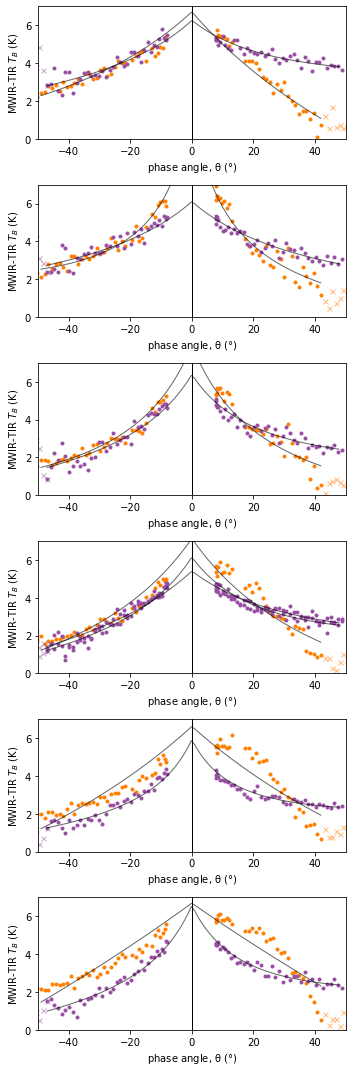

In [24]:
xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

max_phase_angle = 50

# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


print('NW')
axNW, g16_fit_max, g16_fwhm = phase_angle_plot(axNW, df16, pixelNW_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axNW, g17_fit_max, g17_fwhm = phase_angle_plot(axNW, df17, pixelNW_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('A')
axA, g16_fit_max, g16_fwhm = phase_angle_plot(axA, df16, pixelA_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axA, g17_fit_max, g17_fwhm = phase_angle_plot(axA, df17, pixelA_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('B')
axB, g16_fit_max, g16_fwhm = phase_angle_plot(axB, df16, pixelB_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axB, g17_fit_max, g17_fwhm = phase_angle_plot(axB, df17, pixelB_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('C')
axC, g16_fit_max, g16_fwhm = phase_angle_plot(axC, df16, pixelC_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC1_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC2_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('D')
axD, g16_fit_max, g16_fwhm = phase_angle_plot(axD, df16, pixelD_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axD, g17_fit_max, g17_fwhm = phase_angle_plot(axD, df17, pixelD_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('E')
axE, g16_fit_max, g16_fwhm = phase_angle_plot(axE, df16, pixelE_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axE, g17_fit_max, g17_fwhm = phase_angle_plot(axE, df17, pixelE_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-50,50)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')

In [25]:
print(g16_fit_max)
print(g16_fwhm)
print(g17_fit_max)
print(g17_fwhm)

[6.704615596276708, 10.93882055578737, 7.922379582944151, 7.119372549337921, 6.610940174201783, 6.6892754316609695]
[53.42385056740628, 23.608509822988573, 32.93018754375926, 43.09837187849065, 53.77385241307539, 61.80634724508086]
[6.238741732918251, 6.084993577628677, 6.336994261920492, 6.108603959702463, 5.385956393624346, 5.867416123130618, 6.520438002360012]
[78.7537410235602, 80.6722931467445, 47.77316795255178, 50.642212725367024, 73.16479000421506, 40.19962931691033, 37.272761559384264]


[-10.259876114405872, 10.534724316684942, -0.6777846921417708, 0.13900742456165063, 5.564953803952079]
[0.17311537094585935, 6.016072549622604, 0.07335537300674748, 0.8758028342905656, 1.0525605096686768]


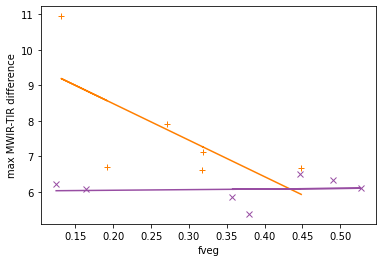

In [26]:
plt.plot(tcc20_mean_g16, g16_fit_max,'+', c='#ff7f00')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g16, g16_fit_max, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g16, np.array(tcc20_mean_g16)*slope + intercept, c='#ff7f00')


plt.plot(tcc20_mean_g17, g17_fit_max,'x', c='#984ea3')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g17, g17_fit_max, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g17, np.array(tcc20_mean_g17)*slope + intercept, c='#984ea3')

plt.xlabel('fveg')
plt.ylabel('max MWIR-TIR difference');

[91.67347827477171, 19.125273244127175, 0.7053637374729128, 0.1174270261533884, 46.06299746352857]
[-91.22496973692664, 90.77241189160208, -0.7643686562725898, 0.04538286925976715, 34.41415042549134]


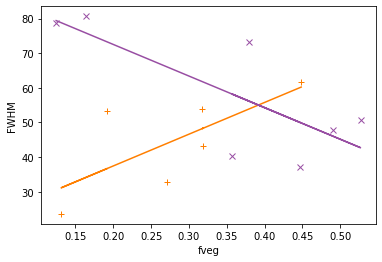

In [27]:
plt.plot(tcc20_mean_g16, g16_fwhm,'+', c='#ff7f00')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g16, g16_fwhm, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g16, np.array(tcc20_mean_g16)*slope + intercept, c='#ff7f00')

plt.plot(tcc20_mean_g17, g17_fwhm,'x', c='#984ea3')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g17, g17_fwhm, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g17, np.array(tcc20_mean_g17)*slope + intercept, c='#984ea3')

plt.xlabel('fveg')
plt.ylabel('FWHM');

---

# figure 3 with simulated data

In [28]:
df16 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-16_simulate_figure3.csv')


In [29]:
df16 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-16_simulate_figure3.csv')
df16.set_index(pd.to_datetime(df16.datetime_list), inplace=True)

signed_phase_angles = [df16.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df16.iloc[1:].phase_angle):
    if df16.iloc[i].phase_angle > df16.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df16['signed_phase_angle'] = signed_phase_angles

df17 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-17_simulate_figure3.csv')
df17.set_index(pd.to_datetime(df17.datetime_list), inplace=True)

signed_phase_angles = [df17.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df17.iloc[1:].phase_angle):
    if df17.iloc[i].phase_angle > df17.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df17['signed_phase_angle'] = signed_phase_angles

In [30]:
startdate, enddate = '2020-02-11 04', '2020-02-12 01'

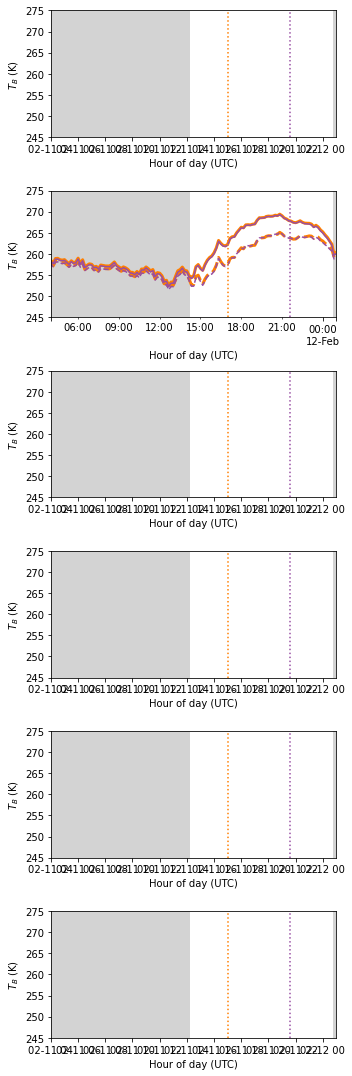

In [31]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


### Pixel A

# GOES-16
df16.b13.plot(ax=axA, color='#ff7f00', linestyle='--', lw=3)
df16.b7.plot(ax=axA, color='#ff7f00', linestyle='-', lw=3)

# GOES-17
df17.b13.plot(ax=axA, color='#984ea3', linestyle='--')
df17.b7.plot(ax=axA, color='#984ea3', linestyle='-')



# formatting
for this_ax in axs.ravel():
    # draw lines for times of minimum phase angles
    this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], 0, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], 0, 1000, color='lightgray', zorder=-999)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(245,275)
    this_ax.set_ylabel('$T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

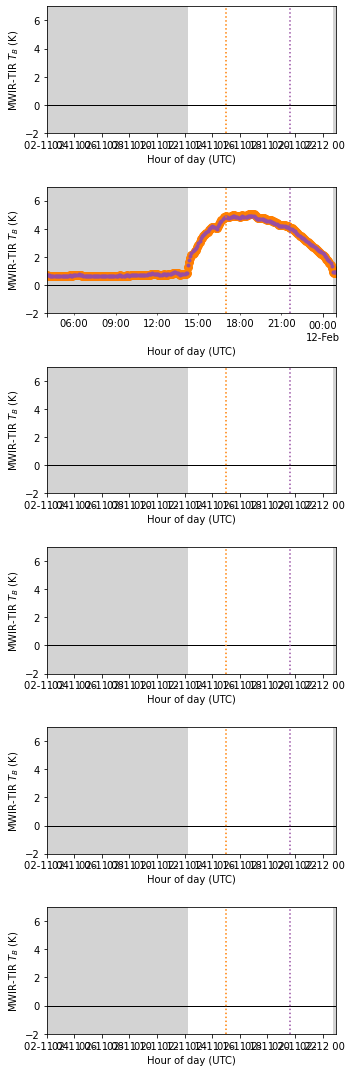

In [32]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel A

# GOES-16
(df16.b7 - df16.b13).plot(ax=axA, linestyle='none', marker='o', color='#ff7f00', markersize=8)

# GOES-17
(df17.b7 - df17.b13).plot(ax=axA, linestyle='none', marker='.', color='#984ea3')


# formatting
for this_ax in axs.ravel():
    # draw lines for times of minimum phase angles
    this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], -100, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], -100, 1000, color='lightgray', zorder=-999)
    #this_ax.text(pd.Timestamp('2020-02-11 07:00:00'), 4.5, 'night', color='#333333')
    this_ax.axhline(0, color='k', zorder=-1, lw=1)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(-2,7)
    this_ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

In [33]:
def phase_angle_plot2(ax, df_phase_angles, 
                     df_rad, 
                     fit_max, fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise2, sunset2,
                     color):

    
    # GOES-16
    xdata_night1 = df_phase_angles.signed_phase_angle[startdate:sunrise1]
    ydata_night1 = df_rad.b7_tb_2km[df_phase_angles.index][startdate:sunrise1] - df_rad.b13_tb_2km[df_phase_angles.index][startdate:sunrise1]
    xdata_day = df_phase_angles.signed_phase_angle[sunrise1:sunset2]
    ydata_day = df_rad.b7_tb_2km[df_phase_angles.index][sunrise1:sunset2] - df_rad.b13_tb_2km[df_phase_angles.index][sunrise1:sunset2]
    xdata_night2 = df_phase_angles.signed_phase_angle[sunset2:enddate]
    ydata_night2 = df_rad.b7_tb_2km[df_phase_angles.index][sunset2:enddate] - df_rad.b13_tb_2km[df_phase_angles.index][sunset2:enddate]

    ## fit curve to GOES-16 daytime phase angles only
    #x_fit, y_fit, this_fit_max, this_fwhm = fit_backscatter_function(xdata_day, ydata_day)
    #fit_max.append(this_fit_max)
    #fwhm.append(this_fwhm)
    #ax.plot(x_fit,y_fit,'-', color=color, lw=1)
    ax.plot(xdata_day, ydata_day, '.', color=color)
    ax.plot(xdata_night1, ydata_night1, 'x', color=color, alpha=0.5)
    ax.plot(xdata_night2, ydata_night2, 'x', color=color, alpha=0.5)
    #ax.text(xtext, ytext, f'max: {str(np.round(fit_max,1))}\nFWHM: {str(np.round(fwhm,1))}', color=color)

    return ax

A
[]
[]
[]
[]


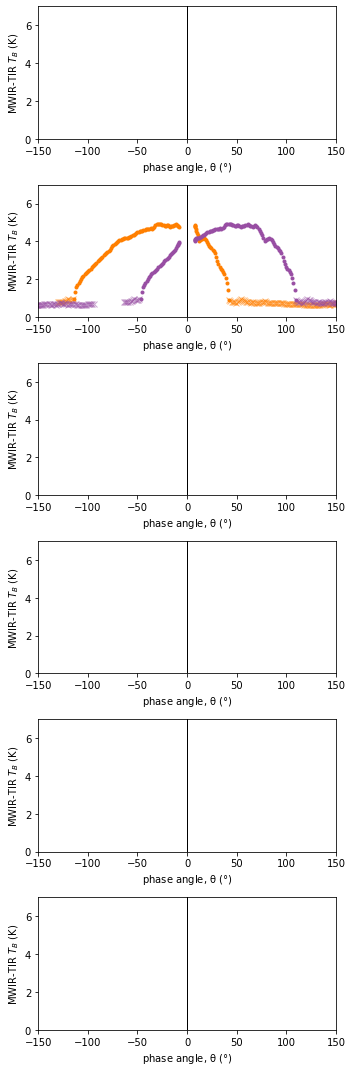

In [34]:
df16['b7_tb_2km'] = df16.b7
df16['b13_tb_2km'] = df16.b13
df17['b7_tb_2km'] = df17.b7
df17['b13_tb_2km'] = df17.b13


xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

phase_angle_limit = 50

# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


print('A')
print(g16_fwhm)
axA = phase_angle_plot2(axA, df16, df17, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00')
print(g16_fwhm)
print(g17_fwhm)
axA = phase_angle_plot2(axA, df17, df17, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3')
print(g17_fwhm)


for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-150,150)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')

## make another plot of simulated GOES with and without solar

In [59]:
df17 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-17_simulate.csv')
df17.set_index(pd.to_datetime(df17.datetime_list), inplace=True)

signed_phase_angles = [df17.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df17.iloc[1:].phase_angle):
    if df17.iloc[i].phase_angle > df17.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df17['signed_phase_angle'] = signed_phase_angles

In [67]:
startdate, enddate = '2020-02-11 04', '2020-02-12 04'

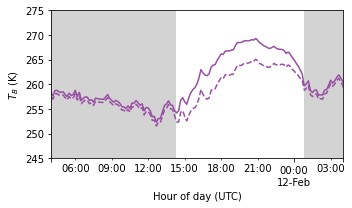

In [68]:
# plot timeseries for one pixel
fig, axA = plt.subplots(nrows=1, ncols= 1, figsize=(5,3), tight_layout=True)



### Pixel A



# GOES-17
df17.b13.plot(ax=axA, color='#984ea3', linestyle='--')
df17.b7.plot(ax=axA, color='#984ea3', linestyle='-')



# formatting
for this_ax in [axA]:
    # draw lines for times of minimum phase angles
    #this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    #this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], 0, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], 0, 1000, color='lightgray', zorder=-999)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(245,275)
    this_ax.set_ylabel('$T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

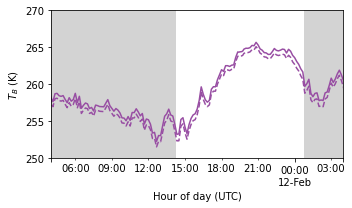

In [80]:
# plot timeseries for one pixel
fig, axA = plt.subplots(nrows=1, ncols= 1, figsize=(5,3), tight_layout=True)



### Pixel A



# GOES-17
df17.b13_woSolar.plot(ax=axA, color='#984ea3', linestyle='--')
df17.b7_woSolar.plot(ax=axA, color='#984ea3', linestyle='-')



# formatting
for this_ax in [axA]:
    # draw lines for times of minimum phase angles
    #this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    #this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], 0, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], 0, 1000, color='lightgray', zorder=-999)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(250,270)
    this_ax.set_ylabel('$T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')
    
plt.savefig('GOESsim_withoutSolar.svg')

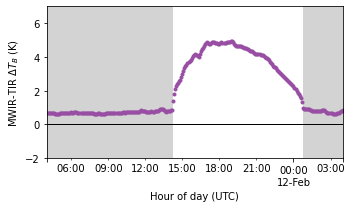

In [75]:
# plot timeseries for one pixel
fig, axA = plt.subplots(nrows=1, ncols= 1, figsize=(5,3), tight_layout=True)



### Pixel A


# GOES-17
(df17.b7 - df17.b13).plot(ax=axA, linestyle='none', marker='.', color='#984ea3')


# formatting
for this_ax in [axA]:
    # draw lines for times of minimum phase angles
    #this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    #this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], -100, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], -100, 1000, color='lightgray', zorder=-999)
    #this_ax.text(pd.Timestamp('2020-02-11 07:00:00'), 4.5, 'night', color='#333333')
    this_ax.axhline(0, color='k', zorder=-1, lw=1)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(-2,7)
    this_ax.set_ylabel('MWIR-TIR $\Delta T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

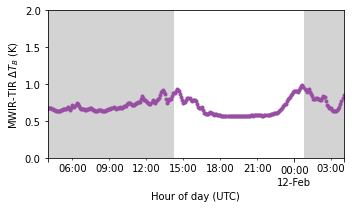

In [85]:
# plot timeseries for one pixel
fig, axA = plt.subplots(nrows=1, ncols= 1, figsize=(5,3), tight_layout=True)



### Pixel A


# GOES-17
(df17.b7_woSolar - df17.b13_woSolar).plot(ax=axA, linestyle='none', marker='.', color='#984ea3')


# formatting
for this_ax in [axA]:
    # draw lines for times of minimum phase angles
    #this_ax.axvline(pd.Timestamp('2020-02-11 17:01:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    #this_ax.axvline(pd.Timestamp('2020-02-11 21:37:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], -100, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], -100, 1000, color='lightgray', zorder=-999)
    #this_ax.text(pd.Timestamp('2020-02-11 07:00:00'), 4.5, 'night', color='#333333')
    this_ax.axhline(0, color='k', zorder=-1, lw=1)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(0,2)
    this_ax.set_ylabel('MWIR-TIR $\Delta T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')
plt.savefig('GOESsim_withoutSolar_deltaTb.svg')

A
[]
[]


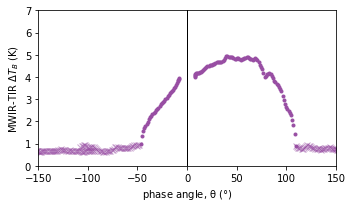

In [77]:
df17['b7_tb_2km'] = df17.b7
df17['b13_tb_2km'] = df17.b13


xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

phase_angle_limit = 50

# plot phase angle curves
fig, axA = plt.subplots(nrows=1, ncols= 1, figsize=(5,3), tight_layout=True)


print('A')

print(g17_fwhm)
axA = phase_angle_plot2(axA, df17, df17, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3')
print(g17_fwhm)


for ax in [axA]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-150,150)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $\Delta T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')

A
[]
[]


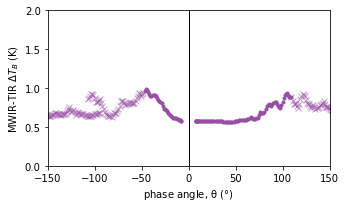

In [76]:
df17['b7_tb_2km'] = df17.b7_woSolar
df17['b13_tb_2km'] = df17.b13_woSolar


xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

phase_angle_limit = 50

# plot phase angle curves
fig, axA = plt.subplots(nrows=1, ncols= 1, figsize=(5,3), tight_layout=True)


print('A')

print(g17_fwhm)
axA = phase_angle_plot2(axA, df17, df17, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3')
print(g17_fwhm)


for ax in [axA]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-150,150)
    ax.set_ylim(0,2)
    ax.set_ylabel('MWIR-TIR $\Delta T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')